In [ ]:
import os
print(os.listdir('../input/flowers/flowers'))

In [1]:
# Ignore  the warnings
import warnings
warnings.filterwarnings('always')
warnings.filterwarnings('ignore')

# data visualisation and manipulation
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns
 
#configure
# sets matplotlib to inline and displays graphs below the corressponding cell.
%matplotlib inline  
style.use('fivethirtyeight')
sns.set(style='whitegrid',color_codes=True)

#model selection
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score,precision_score,recall_score,confusion_matrix,roc_curve,roc_auc_score
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import LabelEncoder

#preprocess.
from keras.preprocessing.image import ImageDataGenerator

#dl libraraies
from keras import backend as K
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam,SGD,Adagrad,Adadelta,RMSprop
from keras.utils import to_categorical

# specifically for cnn
from keras.layers import Dropout, Flatten,Activation
from keras.layers import Conv2D, MaxPooling2D, BatchNormalization
 
import tensorflow as tf
import random as rn

# specifically for manipulating zipped images and getting numpy arrays of pixel values of images.
import cv2                  
import numpy as np  
from tqdm import tqdm
import os                   
from random import shuffle  
from zipfile import ZipFile
from PIL import Image

In [21]:
X=[]
Z=[]
IMG_SIZE=150
batik_bali='C:\\Users\\angelina\\Desktop\\BangkitProject\\DATA\\train_data\\batik-bali'
batik_betawi='C:\\Users\\angelina\\Desktop\\BangkitProject\\DATA\\train_data\\batik-betawi'
batik_celup='C:\\Users\\angelina\\Desktop\\BangkitProject\\DATA\\train_data\\batik-celup'
batik_cendrawasih='C:\\Users\\angelina\\Desktop\\BangkitProject\\DATA\\train_data\\batik-cendrawasih'
batik_ceplok='C:\\Users\\angelina\\Desktop\\BangkitProject\\DATA\\train_data\\batik-ceplok'
batik_ciamis='C:\\Users\\angelina\\Desktop\\BangkitProject\\DATA\\train_data\\batik-ciamis'
batik_garutan='C:\\Users\\angelina\\Desktop\\BangkitProject\\DATA\\train_data\\batik-garutan'
batik_gentongan='C:\\Users\\angelina\\Desktop\\BangkitProject\\DATA\\train_data\\batik-gentongan'
batik_kawung='C:\\Users\\angelina\\Desktop\\BangkitProject\\DATA\\train_data\\batik-kawung'
batik_keraton='C:\\Users\\angelina\\Desktop\\BangkitProject\\DATA\\train_data\\batik-keraton'
batik_lasem='C:\\Users\\angelina\\Desktop\\BangkitProject\\DATA\\train_data\\batik-lasem'
batik_megamendung='C:\\Users\\angelina\\Desktop\\BangkitProject\\DATA\\train_data\\batik-megamendung'
batik_parang='C:\\Users\\angelina\\Desktop\\BangkitProject\\DATA\\train_data\\batik-parang'
batik_pekalongan='C:\\Users\\angelina\\Desktop\\BangkitProject\\DATA\\train_data\\batik-pekalongan'
batik_priangan='C:\\Users\\angelina\\Desktop\\BangkitProject\\DATA\\train_data\\batik-priangan'
batik_sekar='C:\\Users\\angelina\\Desktop\\BangkitProject\\DATA\\train_data\\batik-sekar'
batik_sidoluhur='C:\\Users\\angelina\\Desktop\\BangkitProject\\DATA\\train_data\\batik-sidoluhur'
batik_sidomukti='C:\\Users\\angelina\\Desktop\\BangkitProject\\DATA\\train_data\\batik-sidomukti'
batik_sogan='C:\\Users\\angelina\\Desktop\\BangkitProject\\DATA\\train_data\\batik-sogan'
batik_tambal='C:\\Users\\angelina\\Desktop\\BangkitProject\\DATA\\train_data\\batik-tambal'

In [6]:
def make_train_data(flower_type,DIR):
    for img in tqdm(os.listdir(DIR)):
        label=assign_label(img,flower_type)
        path = os.path.join(DIR,img)
        img = cv2.imread(path,cv2.IMREAD_COLOR)
        img = cv2.resize(img, (IMG_SIZE,IMG_SIZE))
        
        X.append(np.array(img))
        Z.append(str(label))
        

In [31]:
make_train_data('bali',batik_bali)
print(len(X))

100%|███████████████████████████████████████████████████████████████████████████████| 200/200 [00:00<00:00, 671.45it/s]


1800


In [32]:
make_train_data('betawi',batik_betawi)
print(len(X))

100%|███████████████████████████████████████████████████████████████████████████████| 200/200 [00:00<00:00, 676.48it/s]


2000


In [33]:
make_train_data('celup',batik_celup)
print(len(X))

100%|███████████████████████████████████████████████████████████████████████████████| 200/200 [00:00<00:00, 698.82it/s]


2200


In [34]:
make_train_data('cendrawasih',batik_cendrawasih)
print(len(X))

100%|███████████████████████████████████████████████████████████████████████████████| 200/200 [00:00<00:00, 668.56it/s]


2400


In [35]:
make_train_data('ceplok',batik_ceplok)
print(len(X))

100%|███████████████████████████████████████████████████████████████████████████████| 200/200 [00:00<00:00, 703.58it/s]


2600


In [36]:
make_train_data('ciamis',batik_ciamis)
print(len(X))

100%|███████████████████████████████████████████████████████████████████████████████| 200/200 [00:00<00:00, 584.19it/s]


2800


In [37]:
make_train_data('garutan',batik_garutan)
print(len(X))

100%|███████████████████████████████████████████████████████████████████████████████| 200/200 [00:00<00:00, 700.27it/s]


3000


In [38]:
make_train_data('gentongan',batik_gentongan)
print(len(X))

100%|███████████████████████████████████████████████████████████████████████████████| 200/200 [00:00<00:00, 673.38it/s]


3200


In [39]:
make_train_data('kawung',batik_kawung)
print(len(X))

100%|███████████████████████████████████████████████████████████████████████████████| 200/200 [00:00<00:00, 709.65it/s]


3400


In [40]:
make_train_data('keraton',batik_keraton)
print(len(X))

100%|███████████████████████████████████████████████████████████████████████████████| 200/200 [00:00<00:00, 643.53it/s]


3600


In [41]:
make_train_data('lasem',batik_lasem)
print(len(X))

100%|███████████████████████████████████████████████████████████████████████████████| 200/200 [00:00<00:00, 667.17it/s]


3800


In [42]:
make_train_data('megamendung',batik_megamendung)
print(len(X))

100%|███████████████████████████████████████████████████████████████████████████████| 200/200 [00:00<00:00, 669.05it/s]


4000


In [43]:
make_train_data('parang',batik_parang)
print(len(X))

100%|███████████████████████████████████████████████████████████████████████████████| 200/200 [00:00<00:00, 679.00it/s]


4200


In [44]:
make_train_data('pekalongan',batik_pekalongan)
print(len(X))

100%|███████████████████████████████████████████████████████████████████████████████| 200/200 [00:00<00:00, 675.73it/s]


4400


In [45]:
make_train_data('priangan',batik_priangan)
print(len(X))

100%|███████████████████████████████████████████████████████████████████████████████| 200/200 [00:00<00:00, 699.00it/s]


4600


In [46]:
make_train_data('sekar',batik_sekar)
print(len(X))

100%|███████████████████████████████████████████████████████████████████████████████| 200/200 [00:00<00:00, 733.42it/s]


4800


In [47]:
make_train_data('sidoluhur',batik_sidoluhur)
print(len(X))

100%|███████████████████████████████████████████████████████████████████████████████| 200/200 [00:00<00:00, 680.76it/s]


5000


In [48]:
make_train_data('sidomukti',batik_sidomukti)
print(len(X))

100%|███████████████████████████████████████████████████████████████████████████████| 200/200 [00:00<00:00, 691.25it/s]


5200


In [49]:
make_train_data('sogan',batik_sogan)
print(len(X))

100%|███████████████████████████████████████████████████████████████████████████████| 200/200 [00:00<00:00, 723.60it/s]


5400


In [50]:
make_train_data('tambal',batik_tambal)
print(len(X))

100%|███████████████████████████████████████████████████████████████████████████████| 200/200 [00:00<00:00, 705.68it/s]


5600


IndexError: index 2 is out of bounds for axis 1 with size 2

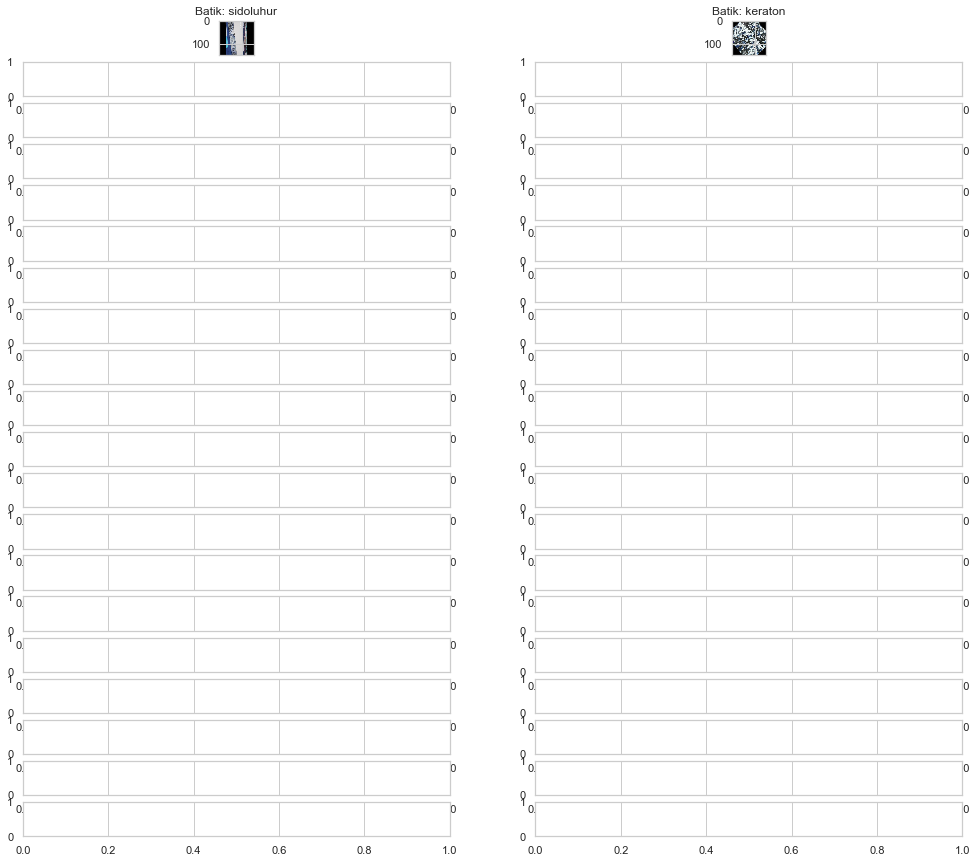

In [69]:
fig,ax=plt.subplots(20,2)
fig.set_size_inches(15,15)
for i in range(0,20):
    for j in range (0,19):
        l=rn.randint(0,len(Z))
        ax[i,j].imshow(X[l])
        ax[i,j].set_title('Batik: '+Z[l])
        
plt.tight_layout()
        

In [65]:
le=LabelEncoder()
Y=le.fit_transform(Z)
Y=to_categorical(Y,20)
X=np.array(X)
X=X/255

IndexError: index 20 is out of bounds for axis 1 with size 20